## 可视化决策树的方式

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
# 加载数据集
dataset = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# 添加品种列
df['Species'] = dataset.target

# 用数值替代品种名作为标签
target = np.unique(dataset.target)
target_names = np.unique(dataset.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.4,
                                                 random_state = 42)
model = DecisionTreeClassifier(max_depth =3, random_state = 42)
model.fit(X_train, y_train)                                         

DecisionTreeClassifier(max_depth=3, random_state=42)

### 文字表示

In [14]:
# 以文字形式输出树     
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



### plot_tree函数

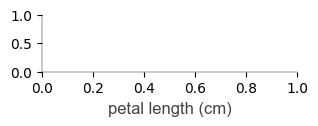

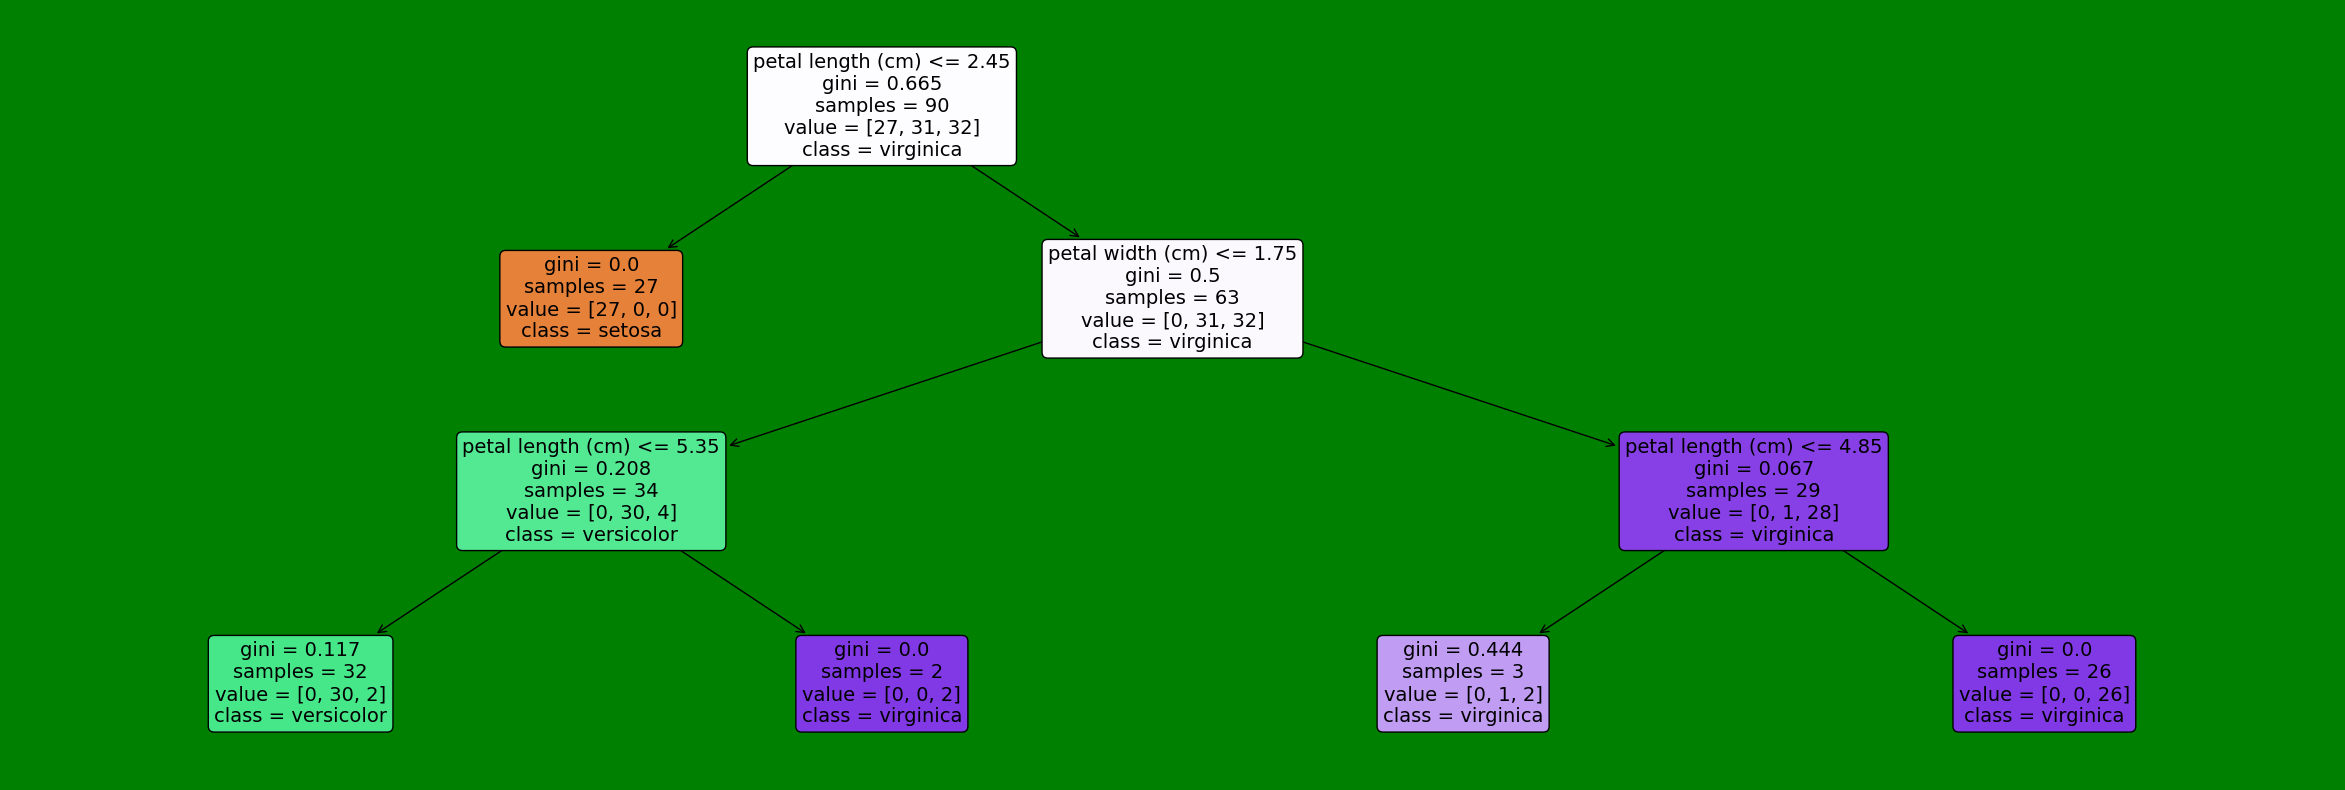

In [15]:
# 用图片画出
plt.figure(figsize=(30,10), facecolor ='g') #
a = tree.plot_tree(model,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()  

### graphviz模块

该模块需要安装graphviz，推荐在ubuntu上```sudo apt install graphviz```或者Mac上```brew install graphviz```

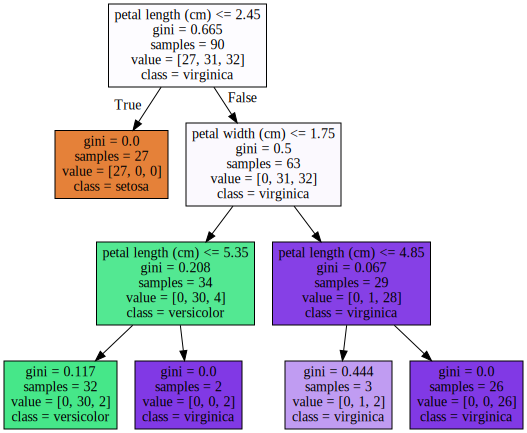

In [16]:

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## sns.heatmap可视化报告

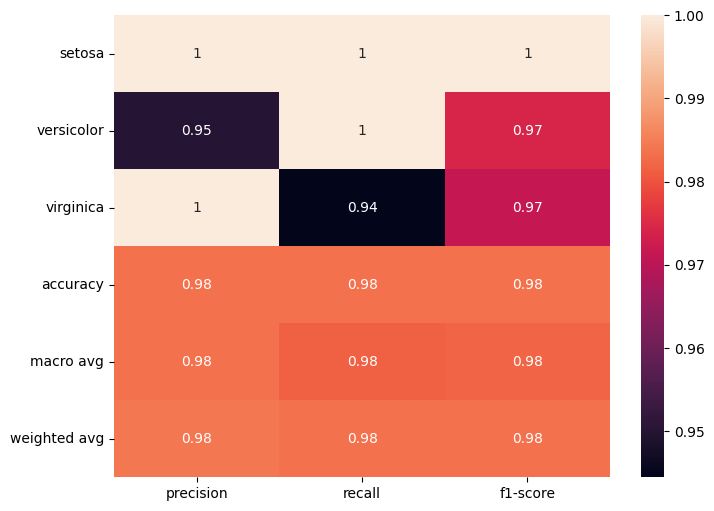

In [28]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import pandas as pd
y_pred = model.predict(X_test)
target_names = np.unique(dataset.target_names)
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()